In [14]:
import datetime as dt
import pandas as pd
from fastquant import get_crypto_data
from matplotlib import dates as mdates
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import ticker as mticker
from mplfinance.original_flavor import candlestick_ohlc

In [19]:
style.use("tableau-colorblind10")

In [20]:
mpl_styles = plt.style.available

In [4]:
crypto = "BTC"
prev_year = dt.date.today() - pd.offsets.DateOffset(years=1)
today = dt.date.today()

In [6]:
df = get_crypto_data(f"{crypto}/USDT", str(prev_year.date()), str(today))

In [8]:
data = df.copy()
data = data.reset_index()
data.rename(columns={"dt":"Date"}, inplace=True)
data["Date"] = pd.to_datetime(data.Date)
data["Date"] = mdates.date2num(data["Date"].values)

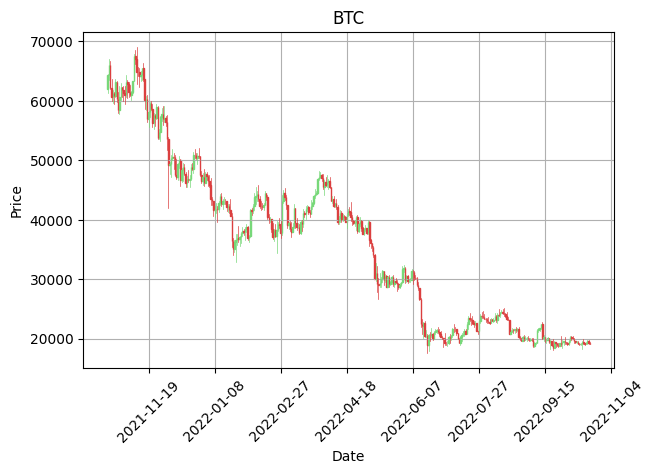

In [25]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

candlestick_ohlc(ax1, data.values, width=0.4, colorup="#77d879", colordown="#db3f3f")

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)

ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)
# ax1.text(data.iloc[len(data)//2, 0], data.iloc[-1, -1], "Crypto Prices")
bbox_props = dict(boxstyle="round", fc="w", ec="k", lw=1)
ax1.annotate(str(data.iloc[-2, -1]), (data.iloc[1, -1], data.iloc[-2, -1]), xytext= (data.iloc[1, -1]+4, data.iloc[-2, -1]), bbox=bbox_props)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(crypto)
# plt.legend()
plt.subplots_adjust(left=0.11, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()